# Wine
> Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

from GAparsimony import GAparsimony, Population, getFitness
from GAparsimony.util import svm_complexity

In [2]:
wine = load_wine()
X, y = wine.data, wine.target 
X = StandardScaler().fit_transform(X)

In [3]:
rerank_error = 0.001
params = {"C":{"range": (00.0001, 99.9999), "type": Population.FLOAT}, 
            "gamma":{"range": (0.00001,0.99999), "type": Population.FLOAT}, 
            "kernel": {"value": "poly", "type": Population.CONSTANT}}

In [4]:
fitness = getFitness(SVC, cohen_kappa_score, svm_complexity, minimize=False, test_size=0.2, random_state=42, n_jobs=-1)

In [5]:
GAparsimony_model = GAparsimony(fitness=fitness,
                                  params=params,
                                  features=wine.feature_names,
                                  keep_history = True,
                                  rerank_error = rerank_error,
                                  popSize = 40,
                                  maxiter = 25, early_stop=10,
                                  feat_thres=0.90, # Perc selected features in first generation
                                  feat_mut_thres=0.10, # Prob of a feature to be one in mutation
                                  seed_ini = 1234)

In [6]:
GAparsimony_model.fit(X, y)

GA-PARSIMONY | iter = 0
  MeanVal = 0.8797661  |  ValBest = 0.9410622  |  TstBest = 0.9574468  |ComplexBest = 10000000045.0| Time(min) = 0.1103874  

GA-PARSIMONY | iter = 1
  MeanVal = 0.9049894  |  ValBest = 0.9456775  |     TstBest = 1.0     |ComplexBest = 11000000044.0|  Time(min) = 0.056866  

GA-PARSIMONY | iter = 2
  MeanVal = 0.9189347  |  ValBest = 0.9456775  |     TstBest = 1.0     |ComplexBest = 11000000044.0| Time(min) = 0.0475173  

GA-PARSIMONY | iter = 3
  MeanVal = 0.9270711  |   ValBest = 0.952701  |  TstBest = 0.9568345  |ComplexBest = 10000000043.0| Time(min) = 0.0446911  

GA-PARSIMONY | iter = 4
  MeanVal = 0.9281385  |   ValBest = 0.960021  |  TstBest = 0.9568345  |ComplexBest = 10000000054.0| Time(min) = 0.0515278  

GA-PARSIMONY | iter = 5
  MeanVal = 0.9201136  |   ValBest = 0.960021  |  TstBest = 0.9568345  |ComplexBest = 10000000054.0| Time(min) = 0.0491387  

GA-PARSIMONY | iter = 6
  MeanVal = 0.9234456  |  ValBest = 0.9687244  |  TstBest = 0.9568345  |Comp

In [7]:
GAparsimony_model.summary()

+------------------------------------+
|             GA-PARSIMONY           |
+------------------------------------+

GA-PARSIMONY settings:
 Number of Parameters      = 2
 Number of Features        = 13
 Population size           = 40
 Maximum of generations    = 25
 Number of early-stop gen. = 10
 Elitism                   = 8
 Crossover probability     = 0.8
 Mutation probability      = 0.1
 Max diff(error) to ReRank = 0.001
 Perc. of 1s in first popu.= 0.9
 Prob. to be 1 in mutation = 0.1

 Search domain = 
                 C    gamma  alcohol  malic_acid  ash  alcalinity_of_ash  \
Min_param   0.0001  0.00001      0.0         0.0  0.0                0.0   
Max_param  99.9999  0.99999      1.0         1.0  1.0                1.0   

           magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
Min_param        0.0            0.0         0.0                   0.0   
Max_param        1.0            1.0         1.0                   1.0   

           proanthocyanins  color_

In [8]:
GAparsimony_model.importance()

+--------------------------------------------+
|                  GA-PARSIMONY              |
+--------------------------------------------+

Percentage of appearance of each feature in elitists: 

  alcohol    ash proline flavanoids alcalinity_of_ash malic_acid  \
0   100.0  100.0   100.0      100.0         99.479167    98.4375   

  od280/od315_of_diluted_wines proanthocyanins      hue nonflavanoid_phenols  \
0                    97.916667          90.625  82.8125            36.979167   

  color_intensity total_phenols magnesium  
0       28.645833         3.125  2.604167  


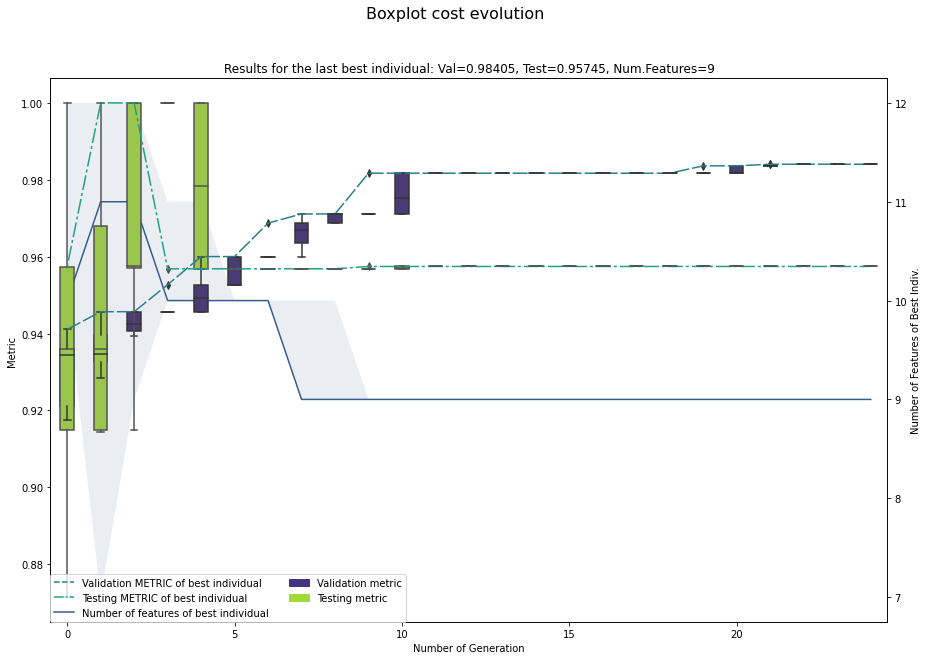

In [9]:
GAparsimony_model.plot(size_plot=(15,10))